In [6]:
dic = {}
with open('dataset/purchase_order.tab') as f:
    for line in f.readlines():
        ele = line.strip().split('\t')
        userid = ele[2]
        productid = ele[3]
        if userid not in dic:
            dic[userid] = [productid]
        else:
            dic[userid].append(productid)
for user in dic:
    print user, len(dic[user])
    break

 U465109665 1


In [8]:
import pandas as pd
m_cols = ['Time','Action','User','Product', 'Quantity','Price']
df = pd.read_csv('dataset/purchase_order.tab', sep='\t', names = m_cols)
df.head()

,Time,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249


In [9]:
df['User'].head()

0      U312622727
1      U239012343
2    U10007697373
3      U296328517
4      U300884570
Name: User, dtype: object

In [10]:
df['User'].count()

54772

In [11]:
df['User'].nunique()

32539

In [13]:
df.groupby('User')['Product'].count().head()

User
U1000001354     1
U10000044910    1
U10000056953    5
U10000065461    1
U10000092625    5
Name: Product, dtype: int64

In [25]:
df2 = df.groupby('Product')['Product'].count().\
sort_values(ascending=False).head(30)

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


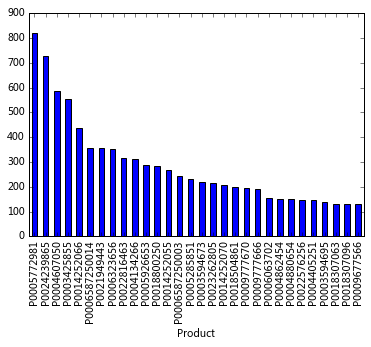

In [27]:
df2.plot(kind='bar')

In [30]:
df.head().to_excel('123.xlsx')

In [32]:
import sqlite3 as lite
with lite.connect('test.sqlite') as db:
    df.to_sql('orders', con = db, if_exists="replace")

## Pandas Aggregation

In [65]:
import pandas as pd
m_cols = ['Time','Action','User','Product', 'Quantity','Price']
orders = pd.read_csv('dataset/purchase_order.tab', sep='\t', names = m_cols, parse_dates={'Dates': [0]})
orders.head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249


In [66]:
#orders['Product'] == 'P0006944501'
#orders[orders['Product'] == 'P0006944501']
orders[orders['Product'] == 'P0006944501']['Price']

0       1069
9       1069
775     1069
2511    1069
2515    1069
2522    1069
5457    1069
5706    1069
Name: Price, dtype: float64

In [67]:
orders[orders['Product'] == 'P0006944501']['Price'].mean()

1069.0

In [68]:
orders[orders['Product'] == 'P0006944501']['Price'].max()

1069.0

In [69]:
orders[orders['Product'] == 'P0006944501']['Price'].min()

1069.0

In [70]:
orders[orders['Product'] == 'P0006944501']['Price'].describe()

count       8
mean     1069
std         0
min      1069
25%      1069
50%      1069
75%      1069
max      1069
Name: Price, dtype: float64

In [71]:
orders.head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249


In [72]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Dates       54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.9+ MB


In [73]:
orders.groupby('Product')['Price'].mean().head()

Product
P0000005913       1590
P0000006020       1290
P0000006591        999
P0000007744       3280
P0000008190011    5083
Name: Price, dtype: float64

In [74]:
orders.groupby('Product')['Price'].mean().sort_values(ascending=False).head()

Product
P0000143511    438888
P0000143500    438888
P0006584093    320000
P0025280275    183900
P0000150006    111375
Name: Price, dtype: float64

In [75]:
orders.groupby('Product')['Price'].mean().sort_values(ascending=False).head(10)

Product
P0000143511       438888
P0000143500       438888
P0006584093       320000
P0025280275       183900
P0000150006       111375
P0018535252        98880
P0024251250030     98800
P0007107866        97900
P0009915463        93900
P0000218240035     93500
Name: Price, dtype: float64

In [76]:
orders.groupby('Product')['Price'].mean().sort_values(ascending=False)[0:3]

Product
P0000143511    438888
P0000143500    438888
P0006584093    320000
Name: Price, dtype: float64

In [77]:
orders['Total_Price'] = orders['Quantity'] * orders['Price']
orders[orders['Quantity'] >= 2].head()

,Dates,Action,User,Product,Quantity,Price,Total_Price
11,2015-07-01 00:05:03,order,U339736346,P0018924850,2,792,1584
13,2015-07-01 00:05:31,order,U465125671,P0003448524,2,390,780
34,2015-07-01 00:18:37,order,U46513478,P0023728806,2,899,1798
39,2015-07-01 00:22:07,order,U34197240,P0020100172,2,199,398
60,2015-07-01 00:39:22,order,U465146448,P0006173160,3,1076,3228


In [78]:
orders.groupby('User')['Total_Price'].sum().sort_values(ascending=False)[0:3]

User
U166708333      2942744
U10120098943    1451117
U142809250       747550
Name: Total_Price, dtype: float64

In [79]:
m_cols = ['Time','Action','User','Product']
views= pd.read_csv('dataset/purchase_view.tab', sep='\t',
            parse_dates={'Dates': [0]},names=m_cols, encoding='utf-8')
views.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 45.5+ MB


In [85]:
orders.groupby(['User','Product'])['Product'].size().head(10)
#type(orders.groupby(['User','Product'])['Product'].size().head(10))

User          Product       
U1000001354   P0014520085       1
U10000044910  P0018800250       1
U10000056953  P0003926850034    1
              P0013344760004    2
              P0013834251       1
              P0014251480003    1
U10000065461  P0023597022       1
U10000092625  P0018474750044    2
              P0023729451       1
              P0024077600013    1
dtype: int64

In [83]:
views.groupby(['User','Product'])['Product'].size().head(10)

User          Product    
None           PNone         1
U10000000225  P0007107111    1
              P0007107122    1
              P0007107413    1
              P0009440001    1
              P0009680484    1
              P0013856054    1
              P0018881936    1
              P0018881940    3
              P0021279602    2
dtype: int64

In [86]:
orders_cnt = orders.groupby(['User','Product'])['Product'].size().reset_index(name='buys')
orders_cnt.head()

,User,Product,buys
0,U1000001354,P0014520085,1
1,U10000044910,P0018800250,1
2,U10000056953,P0003926850034,1
3,U10000056953,P0013344760004,2
4,U10000056953,P0013834251,1


In [88]:
views_cnt = views.groupby(['User','Product'])['Product'].size().reset_index(name='views')
views_cnt.head()

,User,Product,views
0,None,PNone,1
1,U10000000225,P0007107111,1
2,U10000000225,P0007107122,1
3,U10000000225,P0007107413,1
4,U10000000225,P0009440001,1


In [89]:
merge_df = pd.merge(orders_cnt, views_cnt, on=['User','Product'], how='right')


In [91]:
merge_df.head()

,User,Product,buys,views
0,U10000044910,P0018800250,1,2
1,U10000056953,P0013834251,1,7
2,U10000065461,P0023597022,1,1
3,U10000092625,P0023729451,1,14
4,U10000092625,P0024236730,1,4


In [96]:
mdf = merge_df[merge_df['buys'].isnull()].groupby('views')['Product'].count()

In [102]:
mdf.head(10)

views
1     568697
2     104400
3      33909
4      15458
5       7851
6       4548
7       2591
8       1591
9       1043
10       708
Name: Product, dtype: int64

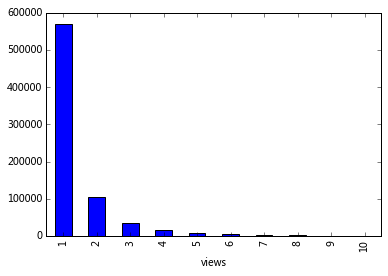

In [105]:
#?mdf.plot
mdf.head(10).plot(kind = 'bar')

In [106]:
mdf2 = merge_df[merge_df['buys'].notnull()].groupby('views')['Product'].count()

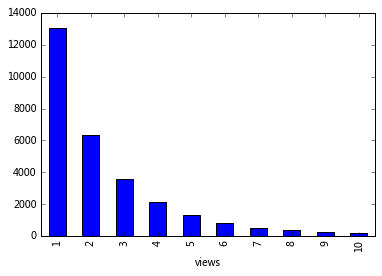

In [108]:
mdf2.head(10).plot(kind='bar')

In [126]:
a = mdf2.head(10).reset_index('views')
a.columns = ['views', 'buy']
a.set_index('views', inplace=True)

a['notbuy'] = mdf.head(10)

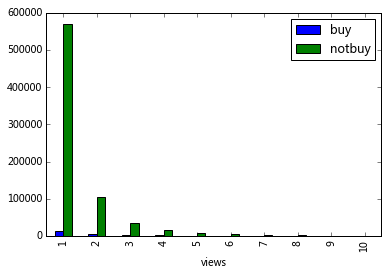

In [127]:
a.plot(kind='bar')

##  Pandas and Matplotlib

In [129]:
views.head()

,Dates,Action,User,Product
0,2015-07-01 00:00:01,view,U129297265,P0023468384
1,2015-07-01 00:00:03,view,U321001337,P0018926456
2,2015-07-01 00:00:05,view,U10070718237,P0000063593
3,2015-07-01 00:00:05,view,U393805241,P0005541535
4,2015-07-01 00:00:10,view,U10004621134,P0022135540


In [130]:
views.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 45.5+ MB


In [131]:
views['Dates'].head()

0   2015-07-01 00:00:01
1   2015-07-01 00:00:03
2   2015-07-01 00:00:05
3   2015-07-01 00:00:05
4   2015-07-01 00:00:10
Name: Dates, dtype: datetime64[ns]

In [153]:
a = views['Dates']
#a.dt.year.head()
#a.dt.month.head()
#a.dt.date.head()
a.dt.hour.head()

0    0
1    0
2    0
3    0
4    0
Name: Dates, dtype: int64

In [139]:
view_cnt = views.groupby(views['Dates'].dt.date)['Action'].count()


In [140]:
#%ls
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [145]:
?view_cnt.plot

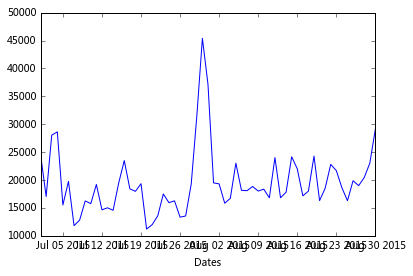

In [144]:
view_cnt.plot(kind='line')

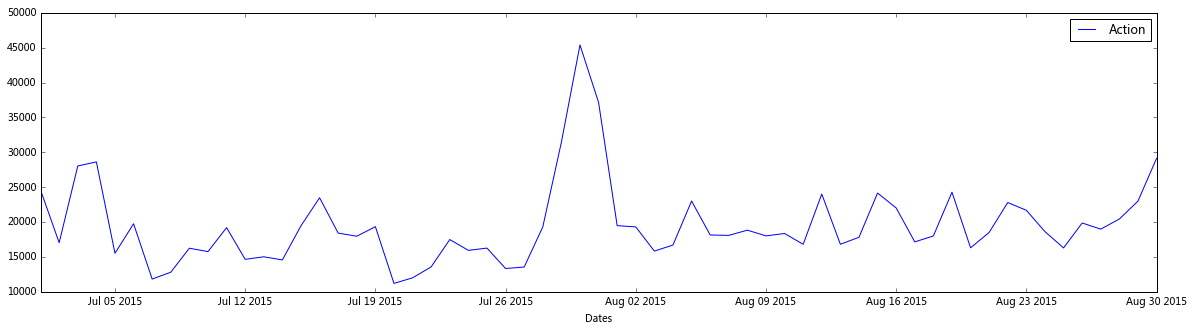

In [151]:
view_cnt.plot(kind='line', figsize=[20,5], legend=True)

In [154]:
view_hour_cnt = views.groupby(views['Dates'].dt.hour)['Action'].count()


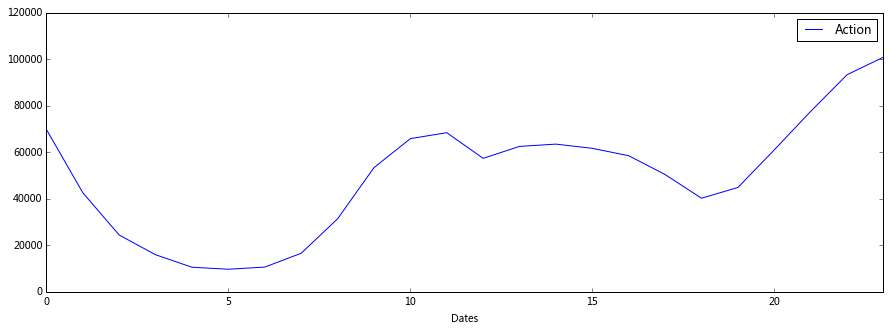

In [157]:
view_hour_cnt.plot(kind='line', figsize=[15,5], legend=True)

In [158]:
buy_cnt = orders.groupby(orders['Dates'].dt.date)['Action'].count()


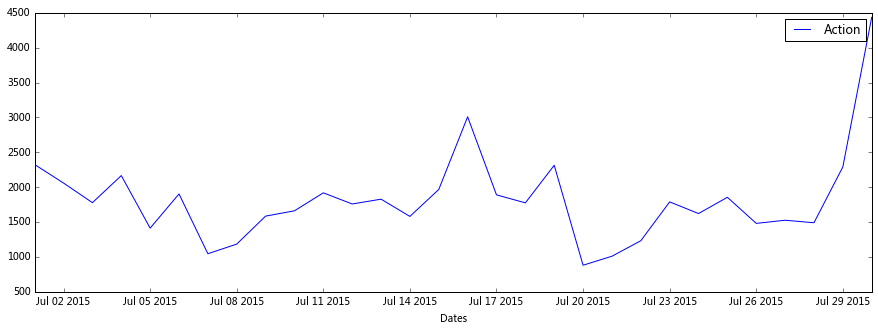

In [159]:
buy_cnt.plot(kind='line', figsize=[15,5], legend=True)

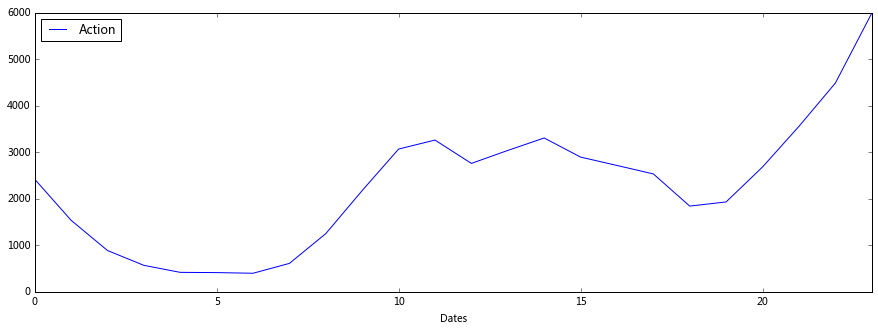

In [160]:
buy_hour_cnt = orders.groupby(orders['Dates'].dt.hour)['Action'].count()
buy_hour_cnt.plot(kind='line', figsize=[15,5], legend=True)

In [161]:
orders['Total_price'] = orders['Quantity'] * orders['Price']


In [163]:
orders.head()

,Dates,Action,User,Product,Quantity,Price,Total_Price,Total_price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069,1069,1069
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680,1680,1680
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285,285,285
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550,550,550
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249,249,249


In [164]:
g = orders.groupby('User')['Total_price'].sum().sort_values(ascending=False)[0:10]


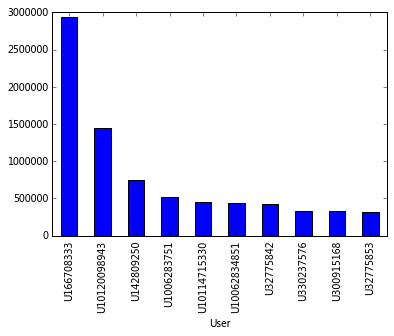

In [165]:
g.plot(kind='bar')

In [168]:
view_daily_cnt = views.groupby(by=views['Dates'].dt.date)['Action'].count()
view_daily_cnt.head()

Dates
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

In [169]:
orders_daily_cnt = orders.groupby(by=orders['Dates'].dt.date)['Action'].count()
orders_daily_cnt.head()

Dates
2015-07-01    2324
2015-07-02    2059
2015-07-03    1778
2015-07-04    2166
2015-07-05    1413
Name: Action, dtype: int64

In [170]:
view_daily_cnt.count()

61

In [171]:
orders_daily_cnt.count()

30

In [181]:
df = pd.concat([view_daily_cnt, orders_daily_cnt], axis=1)

In [182]:
df.tail()

,Action,Action
2015-08-26,19867,NaN
2015-08-27,18985,NaN
2015-08-28,20438,NaN
2015-08-29,23000,NaN
2015-08-30,29138,NaN


In [183]:
#df.dropna()
df.dropna(inplace=True)
#df

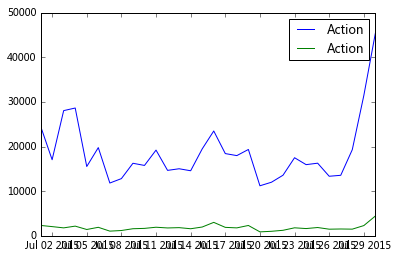

In [184]:
df.plot(kind="line")

In [186]:
df.columns = ['View', 'Buy']

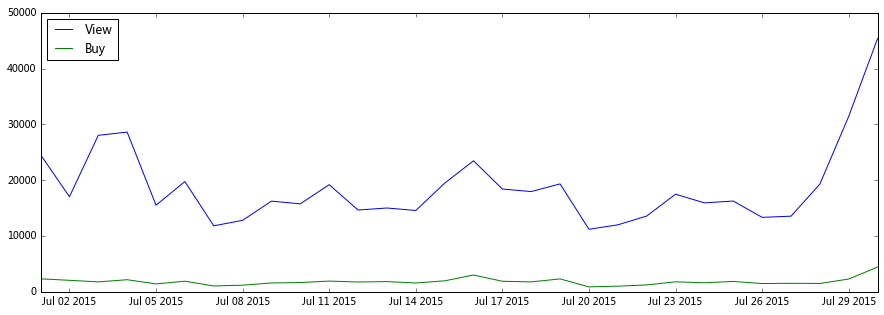

In [188]:
df.plot(kind="line", figsize=[15,5], legend=True)

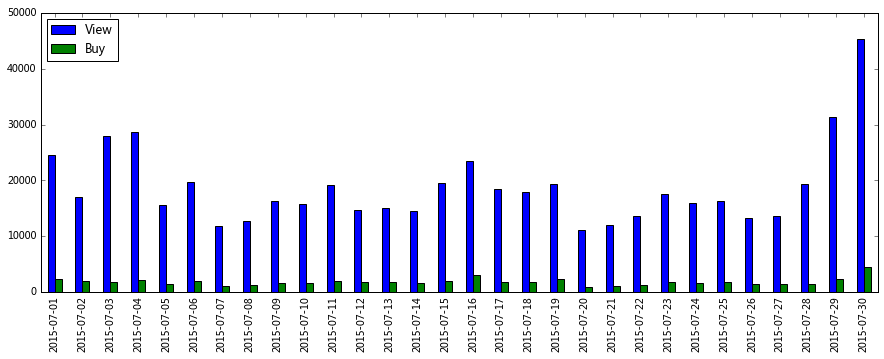

In [189]:
df.plot(kind="bar", figsize=[15,5], legend=True)

## Pandas 分析案例

In [190]:
import pandas as pd
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])


In [191]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [192]:
names1880.tail()

,name,sex,births
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


In [194]:
names1880['sex'].unique()

array(['F', 'M'], dtype=object)

In [195]:
names1880['name'].unique()

array(['Mary', 'Anna', 'Emma', ..., 'Wright', 'York', 'Zachariah'], dtype=object)

In [196]:
names1880['name'].nunique()

1889

In [199]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [200]:
import pandas as pd
namesall = []
for year in range(1880, 2011):
    path = 'names/yob' + str(year) + '.txt'
    df = pd.read_csv(path, names=['name', 'sex', 'births'])
    
    df['year'] = year
    namesall.append(df)


In [202]:
namesall[-1].head()

,name,sex,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010


In [203]:
print type(namesall)

<type 'list'>


In [204]:
df_names = pd.concat(namesall, ignore_index=True)

In [206]:
df_names.count()

name      1690784
sex       1690784
births    1690784
year      1690784
dtype: int64

In [208]:
df_names['year'].unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], dtype=int64)

In [221]:
df_series= df_names.groupby(['year', 'sex'])['births'].sum().head(10)
type(df_series)

pandas.core.series.Series

In [216]:
a.head()

year  sex
1880  F       90993
      M      110493
1881  F       91955
      M      100748
1882  F      107851
Name: births, dtype: int64

In [224]:
#df_names.pivot_table('births', rows='year', cols='sex', aggfunc=sum)
?df_names.pivot_table

In [232]:
births = df_names.pivot_table('births', index='year', columns='sex',\
                              aggfunc=sum)
births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


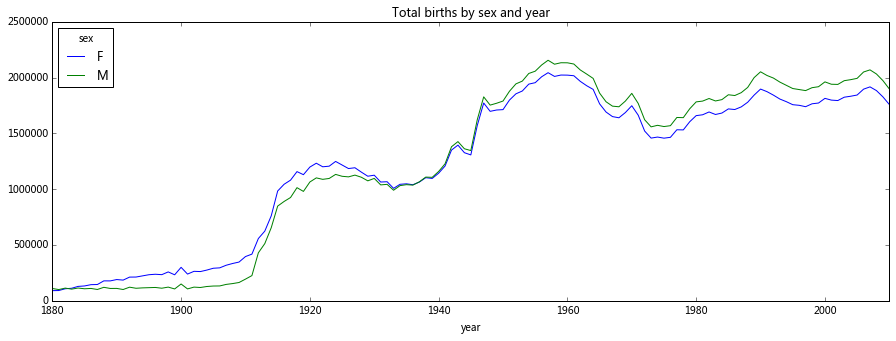

In [233]:
births.plot(kind = 'line', title='Total births by sex and year', \
            figsize=(15, 5))


In [249]:
male = df_names[(df_names['year'] == 2010) & (df_names['sex'] =='M')].groupby('name')['births'].sum().\
     sort_values(ascending=False).head(10)
male.index

Index([u'Jacob', u'Ethan', u'Michael', u'Jayden', u'William', u'Alexander',
       u'Noah', u'Daniel', u'Aiden', u'Anthony'],
      dtype='object', name=u'name')

In [251]:
df_names['name'].head()

0         Mary
1         Anna
2         Emma
3    Elizabeth
4       Minnie
Name: name, dtype: object

In [260]:
male

name
Jacob        21875
Ethan        17866
Michael      17133
Jayden       17030
William      16870
Alexander    16634
Noah         16281
Daniel       15679
Aiden        15403
Anthony      15364
Name: births, dtype: int64

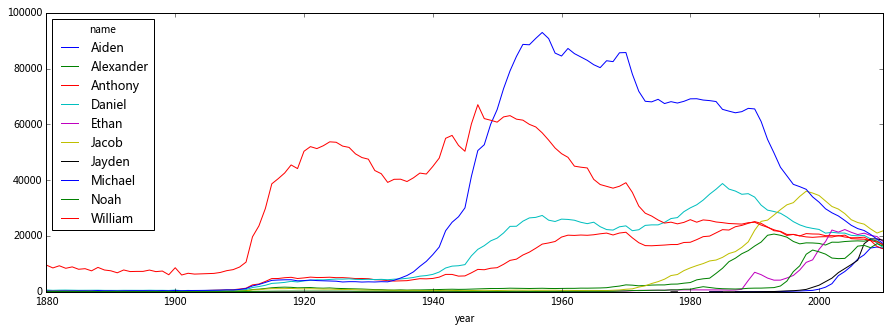

In [283]:
names_in_top10 = df_names[df_names['name'].isin(male.index)]
top_names = names_in_top10.groupby(['name', 'year'])['births'].sum()
births_male = names_in_top10.pivot_table('births', index='year', columns='name',\
                              aggfunc=sum)

births_male.head()
births_male.plot(kind='line', figsize=[15,5])

In [248]:
female = df_names[(df_names['year'] == 2010) & (df_names['sex'] =='F')].groupby('name')['births'].sum().\
     sort_values(ascending=False).head(10)
female

name
Isabella    22731
Sophia      20477
Emma        17179
Olivia      16860
Ava         15300
Emily       14172
Abigail     14124
Madison     13070
Chloe       11656
Mia         10541
Name: births, dtype: int64

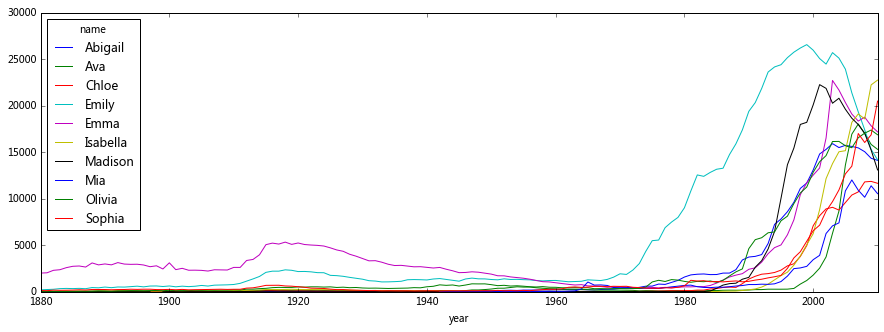

In [285]:
names_in_top10 = df_names[df_names['name'].isin(female.index)]
top_names = names_in_top10.groupby(['name', 'year'])['births'].sum()
births_female = names_in_top10.pivot_table('births', index='year', columns='name',\
                              aggfunc=sum)

births_female.head()
births_female.plot(kind='line', figsize=[15,5])

In [234]:
df_names['name'].head()

0         Mary
1         Anna
2         Emma
3    Elizabeth
4       Minnie
Name: name, dtype: object

In [236]:
df_names['name'].str[-1].head()

0    y
1    a
2    a
3    h
4    e
Name: name, dtype: object

In [286]:
df_names['name'].str[-1].head()
df_last_letter = df_names[df_names['sex'] == 'M']
df_last_letter['last_letter'] = df_last_letter['name'].str[-1]
df_last_letter.head(10)


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,name,sex,births,year,last_letter
942,John,M,9655,1880,n
943,William,M,9533,1880,m
944,James,M,5927,1880,s
945,Charles,M,5348,1880,s
946,George,M,5126,1880,e
947,Frank,M,3242,1880,k
948,Joseph,M,2632,1880,h
949,Thomas,M,2534,1880,s
950,Henry,M,2444,1880,y
951,Robert,M,2416,1880,t


In [289]:
table = df_last_letter.pivot_table('births', index='last_letter', columns=['year'], aggfunc=sum)
table


year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
last_letter,,,,,,,,,,,,,,,,,,,,,
a,776,767,773,757,817,713,775,700,819,704,...,39124,38815,37825,38650,36838,36156,34654,32901,31430,28438
b,509,470,506,452,496,441,452,434,468,389,...,50950,49284,48065,45914,43144,42600,42123,39945,38862,38859
c,349,331,349,299,319,301,283,261,305,271,...,27113,27238,27697,26778,26078,26635,26864,25318,24048,23125
d,9177,8387,9702,8796,9856,9214,9710,9033,10600,10167,...,60838,55829,53391,51754,50670,51410,50595,47910,46172,44398
e,13493,12406,14613,13191,14637,14048,14475,13212,15744,14389,...,145395,144651,144769,142098,141123,142999,143698,140966,135496,129012
f,108,83,135,106,131,115,112,124,140,124,...,1758,1817,1819,1904,1985,1968,2090,2195,2212,2255
g,147,146,146,135,160,182,141,117,190,124,...,2151,2084,2009,1837,1882,1929,2040,2059,2396,2666
h,4049,3766,4176,3925,4242,4055,4087,3951,4638,4261,...,85959,88085,88226,89620,92497,98477,99414,100250,99979,98090
i,200,206,207,167,158,147,171,139,181,154,...,20980,23610,26011,28500,31317,33558,35231,38151,40912,42956


In [290]:
subtable = table[[1906, 1956, 2006]]
subtable


year,1906,1956,2006
last_letter,,,
a,654,4936,36156
b,276,1980,42600
c,315,9848,26635
d,14892,285524,51410
e,19721,175848,142999
f,139,2772,1968
g,266,11864,1929
h,6024,84356,98477
i,107,1159,33558


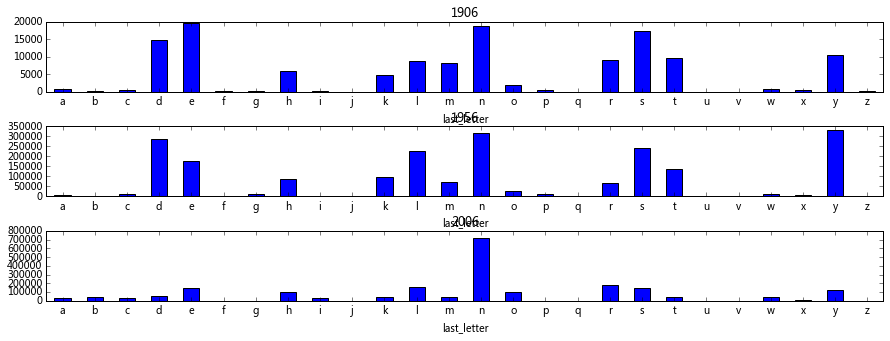

In [291]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

subtable[1906].plot(kind='bar', rot=0, ax=axes[0], title='1906')
subtable[1956].plot(kind='bar', rot=0, ax=axes[1], title='1956')
subtable[2006].plot(kind='bar', rot=0, ax=axes[2], title='2006')

plt.show()


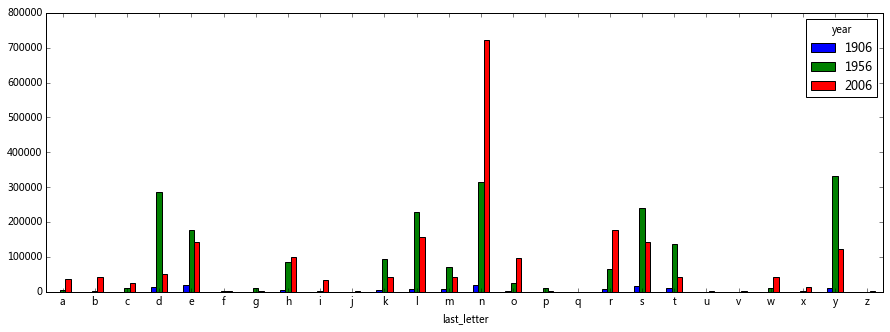

In [294]:
subtable.plot(kind='bar', rot=0, figsize=(15, 5))

In [295]:
subtable.sum(axis=0)
ratio_subtable = subtable / subtable.sum(axis=0)
ratio_subtable


year,1906,1956,2006
last_letter,,,
a,0.004911,0.002336,0.017635
b,0.002073,0.000937,0.020778
c,0.002366,0.004661,0.012991
d,0.111836,0.135123,0.025075
e,0.148101,0.083219,0.069748
f,0.001044,0.001312,0.000960
g,0.001998,0.005615,0.000941
h,0.045239,0.039921,0.048032
i,0.000804,0.000548,0.016368


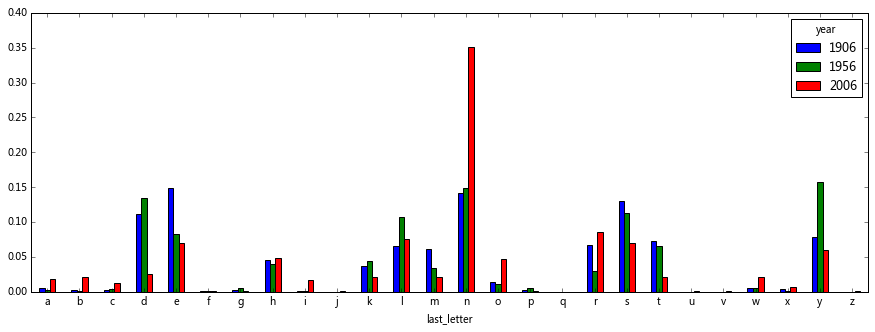

In [296]:
ratio_subtable.plot(kind='bar', rot=0, figsize=(15, 5))


In [297]:
ratio_table = table / table.sum(axis=0)
ratio_table


year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
last_letter,,,,,,,,,,,,,,,,,,,,,
a,0.007023,0.007613,0.006799,0.007235,0.007139,0.006614,0.006996,0.006903,0.006777,0.006366,...,0.020162,0.020019,0.019177,0.019505,0.018481,0.017635,0.016747,0.016189,0.015927,0.014980
b,0.004607,0.004665,0.004451,0.004320,0.004334,0.004091,0.004080,0.004280,0.003872,0.003517,...,0.026256,0.025418,0.024368,0.023171,0.021645,0.020778,0.020357,0.019655,0.019693,0.020470
c,0.003159,0.003285,0.003070,0.002858,0.002787,0.002792,0.002554,0.002574,0.002524,0.002450,...,0.013972,0.014048,0.014042,0.013514,0.013083,0.012991,0.012983,0.012458,0.012186,0.012181
d,0.083055,0.083247,0.085340,0.084066,0.086120,0.085472,0.087647,0.089072,0.087707,0.091934,...,0.031352,0.028794,0.027069,0.026118,0.025420,0.025075,0.024451,0.023574,0.023398,0.023387
e,0.122116,0.123139,0.128537,0.126070,0.127895,0.130313,0.130658,0.130280,0.130270,0.130111,...,0.074927,0.074603,0.073396,0.071710,0.070799,0.069748,0.069445,0.069362,0.068663,0.067959
f,0.000977,0.000824,0.001187,0.001013,0.001145,0.001067,0.001011,0.001223,0.001158,0.001121,...,0.000906,0.000937,0.000922,0.000961,0.000996,0.000960,0.001010,0.001080,0.001121,0.001188
g,0.001330,0.001449,0.001284,0.001290,0.001398,0.001688,0.001273,0.001154,0.001572,0.001121,...,0.001108,0.001075,0.001019,0.000927,0.000944,0.000941,0.000986,0.001013,0.001214,0.001404
h,0.036645,0.037380,0.036732,0.037512,0.037066,0.037615,0.036891,0.038960,0.038376,0.038530,...,0.044297,0.045429,0.044729,0.045227,0.046404,0.048032,0.048044,0.049328,0.050664,0.051670
i,0.001810,0.002045,0.001821,0.001596,0.001381,0.001364,0.001544,0.001371,0.001498,0.001393,...,0.010812,0.012177,0.013187,0.014383,0.015711,0.016368,0.017026,0.018772,0.020732,0.022628


In [298]:
dny = ratio_table.ix[['d', 'n', 'y']]
dny


year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
last_letter,,,,,,,,,,,,,,,,,,,,,
d,0.083055,0.083247,0.085340,0.084066,0.086120,0.085472,0.087647,0.089072,0.087707,0.091934,...,0.031352,0.028794,0.027069,0.026118,0.025420,0.025075,0.024451,0.023574,0.023398,0.023387
n,0.153213,0.153214,0.149560,0.151646,0.149915,0.146361,0.149659,0.148838,0.151286,0.151976,...,0.317495,0.325086,0.336344,0.341151,0.344319,0.351666,0.358274,0.361101,0.362523,0.362771
y,0.075760,0.077451,0.077537,0.079144,0.080405,0.081882,0.081681,0.082870,0.084919,0.086328,...,0.071687,0.069397,0.066197,0.064781,0.062806,0.060338,0.059634,0.060342,0.057223,0.058168


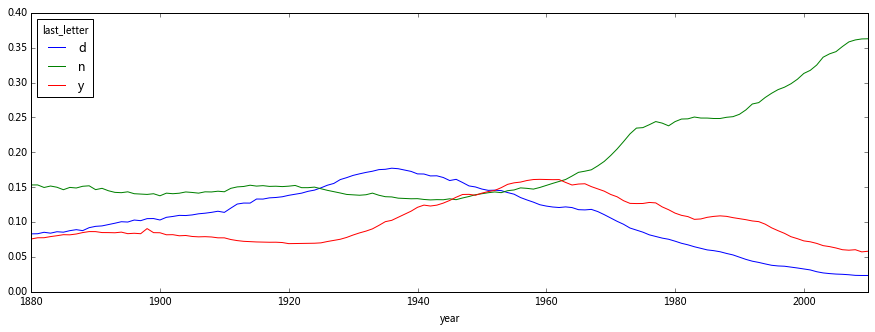

In [299]:
dny.T
dny.T.plot(rot=0, figsize=(15, 5))
